In [1]:
import pandas as pd
dataset = pd.read_csv("~/Downloads/titanic/train.csv")
print(dataset.shape)
dataset.head()

(891, 12)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [2]:
dataset = dataset[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
dataset = pd.get_dummies(dataset,columns=["Embarked","Sex"], drop_first=True).dropna()

In [3]:
X = dataset.drop(axis=1, labels=["Survived"])
y = dataset["Survived"]

In [47]:
def processDataSet(df):
    df= df[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
    X = pd.get_dummies(df,columns=["Embarked","Sex"], drop_first=True).fillna(0)
    return X
    

In [14]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(solver="lbfgs", max_iter=1000)
cls.fit(X, y)
cls.score(X, y)

0.803921568627451

In [15]:
print(X.iloc[0])
print("Survived!" if y.iloc[0] else "Die")

print(cls.predict([X.iloc[0]]))
print(cls.predict_proba([X.iloc[0]]) )
#print(cls.coef_)


Pclass         3.00
Age           22.00
SibSp          1.00
Parch          0.00
Fare           7.25
Embarked_Q     0.00
Embarked_S     1.00
Sex_male       1.00
Name: 0, dtype: float64
Die
[0]
[[0.90328366 0.09671634]]


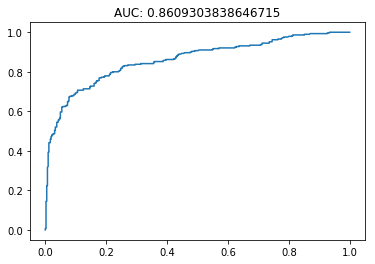

In [16]:
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt

def plotMetrics(X, y, cls):
    y_pred_proba = cls.predict_proba(X)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
    auc = metrics.roc_auc_score(y, y_pred_proba)
    plt.title("AUC: {}".format(auc))
    plt.plot(fpr,tpr)
plotMetrics(X,y,cls)

In [11]:
from sklearn import svm
cls2 = svm.SVC(probability=True, gamma="auto")
cls2.fit(X, y)
cls2.score(X, y)

0.8935574229691877

In [48]:
X_test = processDataSet(pd.read_csv("~/Downloads/titanic/test.csv"))

datatrain = X_test.drop(axis=1, columns=["PassengerId"])
y_result = cls2.predict(datatrain)

X_test["Survived"] = y_result
X_test[["PassengerId","Survived"]].to_csv("predictions_marc.csv", index=False)